In [1]:
%matplotlib inline
# %matplotlib notebook # Does not work 
import pickle
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def plot_best_n_evals(runs, window):

    loss_data = []
    n_data = []
    t_data = []
    n = 0
    while( n < len(runs) ):
#         print(runs[0:n])
#         print(runs[:n-1])
        n += window
        best_config_at_n = min(runs[0:n], key=lambda x: x.loss)
      
        loss_data.append(best_config_at_n.loss) 
        if n > len(runs):
            n_data.append(len(runs))
        else:
            n_data.append(n)
            
#         t_data.append(best_config_at_n.time_stamps['submitted'])
        t_data.append(best_config_at_n.time_stamps['finished'])
        
    return { 
            'loss_data': loss_data,
            'n_data': n_data,
            't_data': t_data
            }

In [3]:
def get_runs(file):
    results = pickle.load(open(file, "rb"))
    return results['hpo_results']

In [4]:
dataset = 'bioasq'
workdir = './' + dataset + '_dir/'

# res_file = './pruebas/bioasq_hpo_results_bohb.pickle'
bohb_file = './bioasq_dir/bioasq_hpo_results_bohb.pickle'
rs_file = './bioasq_dir/bioasq_hpo_results_rs.pickle'


bohb_results = get_runs(bohb_file)
rs_results = get_runs(rs_file)

In [5]:
len(bohb_results.get_all_runs(True))

250

In [6]:
all_runs_bohb = bohb_results.get_all_runs(True)
all_runs_rs = rs_results.get_all_runs()

In [11]:
rs_results.get_runs_by_id(rs_results.get_incumbent_id())

[config_id: (331, 0, 0)	budget: 100.000000	loss: 0.5505
 time_stamps: 18294.53604412079 (submitted), 18294.536137104034 (started), 18346.50132703781 (finished)
 info: {'s': {'metric': 0.4495, 'info': {'map': '0.4495', 'P_20': '0.2645', 'ndcg_cut_20': '0.5521'}}, 'mean_metric': 0.4495, 'std_metric': 0.0}]

In [10]:
bohb_results.get_runs_by_id(bohb_results.get_incumbent_id())

[config_id: (36, 0, 0)	budget: 33.333333	loss: 0.5636
 time_stamps: 4234.0231947898865 (submitted), 4234.02326464653 (started), 4261.124184131622 (finished)
 info: {'s': {'metric': 0.4364, 'info': {'map': '0.4364', 'P_20': '0.2605', 'ndcg_cut_20': '0.5389'}}, 'mean_metric': 0.4364, 'std_metric': 0.0},
 config_id: (36, 0, 0)	budget: 100.000000	loss: 0.5534
 time_stamps: 4312.261118173599 (submitted), 4312.261226177216 (started), 4373.469438791275 (finished)
 info: {'s': {'metric': 0.4466, 'info': {'map': '0.4466', 'P_20': '0.2650', 'ndcg_cut_20': '0.5512'}}, 'mean_metric': 0.4466, 'std_metric': 0.0}]

In [27]:
plot_data_bohb = plot_best_n_evals(all_runs_bohb, 1)
plot_data_rs = plot_best_n_evals(all_runs_rs, 1)

    #Plotting to our canvas

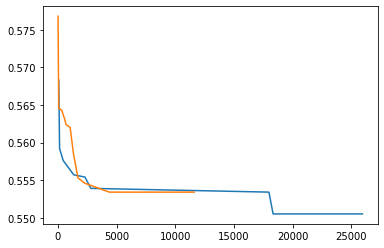

In [31]:
hour = 1

incumbent_rs = rs_results.get_incumbent_trajectory()
incumbent_bohb = bohb_results.get_incumbent_trajectory()
plt.plot([x/hour for x in incumbent_rs['times_finished']], incumbent_rs['losses'])
plt.plot([x/hour for x in incumbent_bohb['times_finished']], incumbent_bohb['losses'])
plt.show()

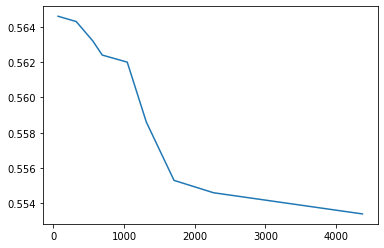

In [33]:
#Showing what we plotted

plt.plot([x/hour for x in plot_data_bohb['t_data']], plot_data_bohb['loss_data'])
# plt.plot([x/hour for x in plot_data_rs['t_data']], plot_data_rs['loss_data'])
plt.show()